In [138]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

#This will be used to plot a 3d graph of the area of interest
px.set_mapbox_access_token(open("mapbox_token.txt").read())

# Exploratory data analysis

In [139]:
#CSV to pandas DataFrame
df_data = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [140]:
df_data.head(15)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
5,1170,0,50,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.548751,-46.477195
6,1000,180,52,1,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.549840,-46.484137
7,900,150,40,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.539740,-46.492670
8,1000,0,65,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.548751,-46.477195
9,1000,0,100,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.548751,-46.477195


In [141]:
df_rent = df_data[df_data["Negotiation Type"] == "rent"]
#df_rent
#df_rent.shape
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [142]:
#df_rent.describe()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

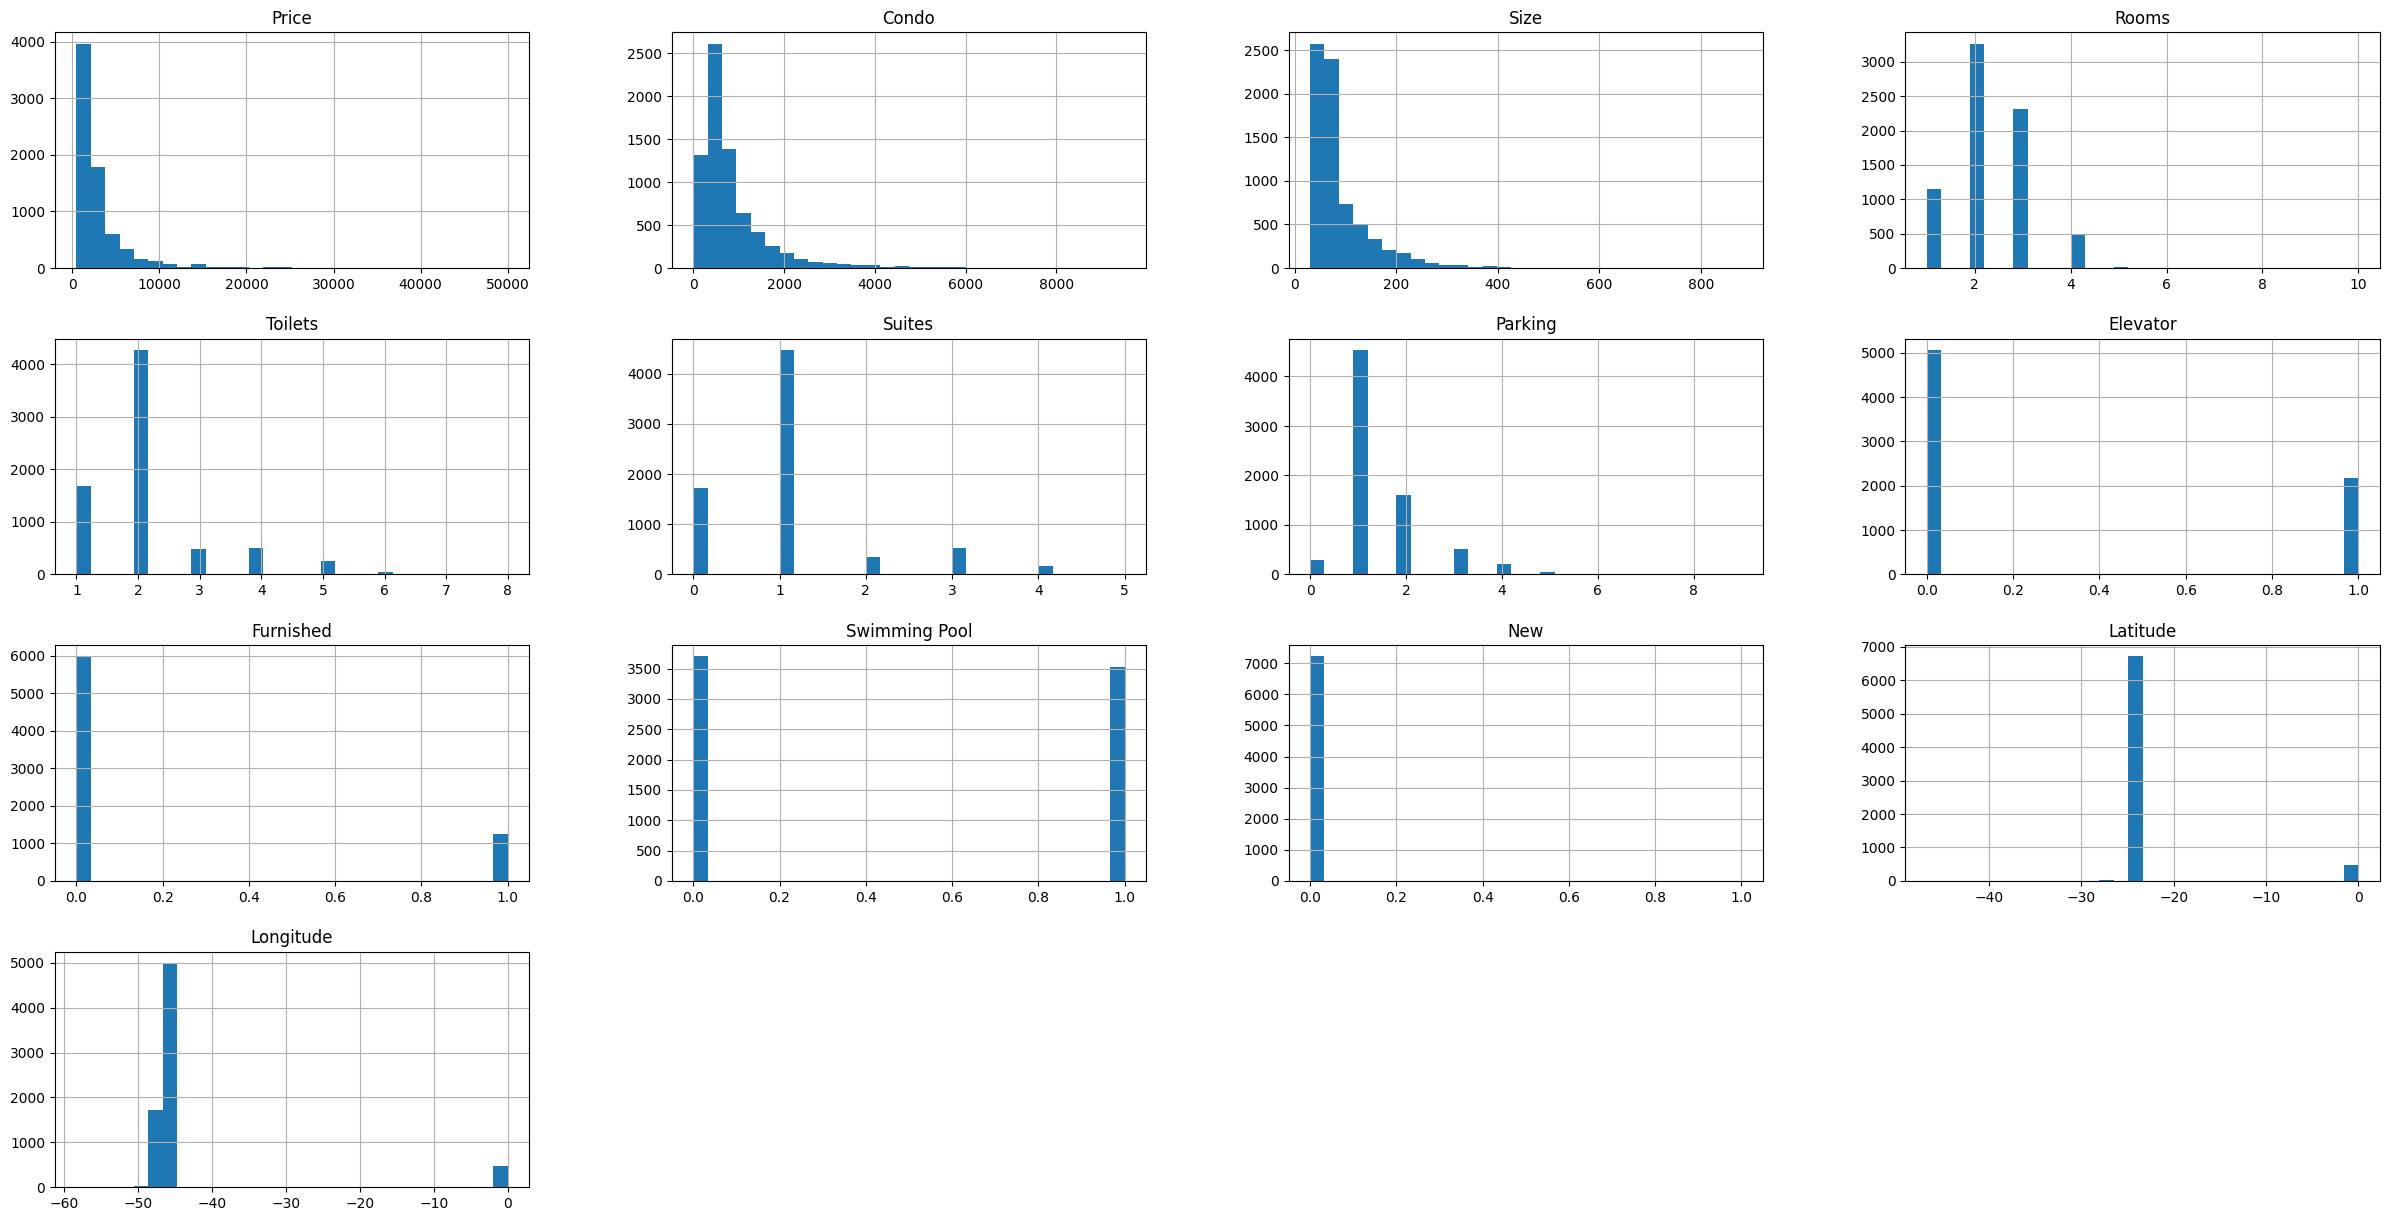

In [143]:
df_rent.hist(bins = 30, figsize=(30,15))

In [144]:
#Eliminating useless features
#Those columns hold no important information. They have the same information for every observation in this dataset.
df_rent_cleaned = df_rent.drop(['New', 'Negotiation Type', 'Property Type'], axis =1)
df_rent_cleaned

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482


In [145]:
#Plotting city map and adding visual effects.
#Color scale wil be chosen for variable Price and size of the scatter for the size of the property
fig = px.scatter_mapbox(df_rent, lat='Latitude', lon = "Longitude", color = 'Price', size = 'Size', 
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15,zoom=10,opacity=0.4)


fig.update_coloraxes(colorscale = [[0, 'rgb(255, 250, 230, 0.5)'],
                      [0.02, 'rgb(255, 159, 102,0.5)'],
                      [0.05, 'rgb(255, 95, 0,0.5)'],
                      [0.10, 'rgb(125, 87, 198,0.5)'],
                      [0.15, 'rgb(0, 35, 121,0.5)'],
                      [1, 'rgb(0,0,0,0.5)']
                     ],                                  
                  )

fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.69486)))
fig.show()

# Data preparation - Three ways to deal with categorical data
- Ordinal Encoder -> More suitable when the sample hass less classes up to 3 or 4.
- OneHot Encoder
- Get Dummies
  
Machine learning models don't handle categorical data very well. They need to be numbers. However, in this case, since we have more than 90 variables, caution is necessary because the model might interpret the number as a magnitude rather than a category. In these cases, we will use one-hot encoding.

To do this, we will use Scikit-Learn to process the column df_rent_cleaned['District'], which contains the neighborhoods.

#### Ordinal Encoder

In [146]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
district_encoded = ordinal_encoder.fit_transform(df_rent_cleaned[['District']])

In [147]:
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

#### OneHot Encoder
One-hot encoding will transform all the categories within a column into new columns. In this study, each neighborhood becomes a column. If that specific property (sample) belongs to that neighborhood, the value 1 is assigned to the neighborhood's column. Otherwise, it's 0.

In [148]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(df_rent_cleaned[['District']])
housing_cat_1hot

#A classe do tipo sparse matrix é uma representação do computador para economizar memória, deletanto tudo o que
#são zeros em uma matriz muito grande contendo zeros e uns. 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7228 stored elements and shape (7228, 94)>

In [149]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Get Dummies from pandas

In [150]:
one_hot = pd.get_dummies(df_rent_cleaned['District'], dtype=int) #aqui se eu não declaro o dtype, retorna boolean
df = df_rent_cleaned.drop('District', axis=1)
df = df.join(one_hot)
df


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
#one_hot

# Trainning first models

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
Y = df['Price']
X = df.loc[:, df.columns != 'Price']

In [154]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [155]:
y_train

9545     3400
130      1300
2102     3300
4493     1100
5420    13000
        ...  
3278     3500
2411     5000
4485     1000
1993     4800
1535     6000
Name: Price, Length: 5059, dtype: int64

In [156]:
x_train

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
9545,1000,155,2,2,1,2,1,0,0,-23.563710,...,0,0,0,0,0,0,0,0,0,1
130,0,70,3,2,1,1,0,0,0,-23.552162,...,0,0,0,0,0,0,0,0,0,0
2102,1050,94,2,3,1,2,1,0,1,-23.525467,...,0,1,0,0,0,0,0,0,0,0
4493,310,49,2,1,0,1,0,0,0,-23.440198,...,0,0,0,0,0,0,0,0,0,0
5420,1980,258,4,4,3,4,0,0,1,-23.619481,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,890,120,3,2,1,2,1,0,1,-23.587324,...,0,0,0,0,0,0,0,1,0,0
2411,683,60,2,2,1,2,0,0,1,-23.549161,...,0,0,0,0,0,0,0,0,0,0
4485,0,42,2,1,0,1,0,0,0,-23.440198,...,0,0,0,0,0,0,0,0,0,0
1993,1000,60,2,2,1,3,1,1,1,-23.561530,...,0,0,0,0,0,0,0,0,0,0


# Models used
- Linear Regression
- Decision Tree
- Random Forest

### Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # Here, the cost function will be used for model optimization.
# The cost function is what the model aims to optimize, which is the sum of the difference between the predicted and actual values.

LinearRegression()

In [158]:
#Comparison between actual values and predictions
alguns_dados = x_train.iloc[:10]
algumas_labels = y_train.iloc[:10] #label é a variável resposta. 

#
print("Predições: ", lin_reg.predict(alguns_dados).round()) #Using model to obtain answers.
print("Valor real: ", algumas_labels.values)

Predições:  [ 4646.   977.  3963.   796. 11484.  2477. 10425.  1473.  3042.  1786.]
Valor real:  [ 3400  1300  3300  1100 13000  2450  3300  2000  2000  1700]


In [159]:
#How to tell if it was a good or bad prediction. Some method we can apply to compare dfferent models
#RMSE - Root mean squared error

from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(1953.4306511313466)

Underfitting problem

### Decision Tree Regression

In [160]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [161]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
print('tree_mse: ', tree_mse)
print('tree_rmse: ', tree_rmse)

tree_mse:  1462.9753409764776
tree_rmse:  38.248860649390295


Overfitting

## Cross validation
Cross-validation is a widely used technique for evaluating the performance of machine learning models. CV involves partitioning the data into sets (parts), where one set is used for training and another set is used for testing and evaluating the model's performance. The use of CV has a high chance of detecting whether your model is overfitting your training data, meaning it is suffering from overfitting. There are multiple methods of applying CV, such as K-fold.

K-fold consists of randomly dividing the dataset into K subsets (where K is predefined) with approximately the same number of samples in each. In each iteration of training and testing, a set of K-1 subsets is used for training, and the remaining subset is used for testing, generating a metric result for evaluation (e.g., accuracy). This process ensures that each subset will be used for testing at some point during the model evaluation.
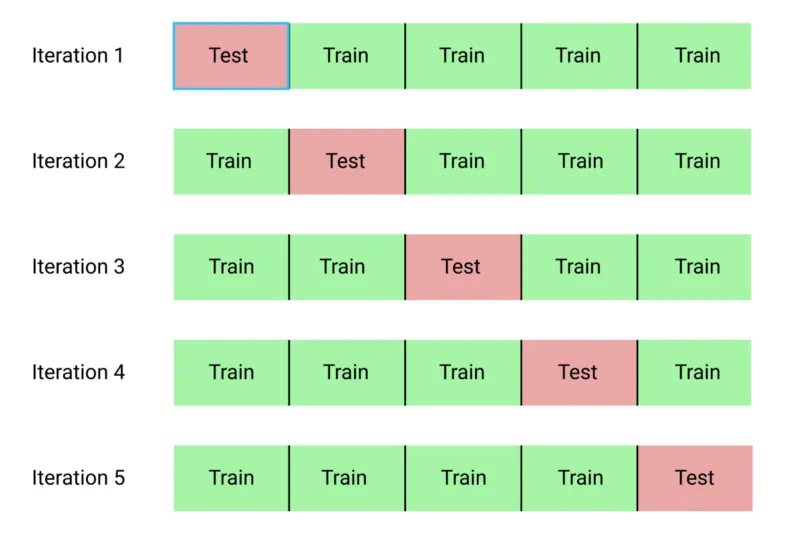

In [162]:
#Cross validation for Decision Tree model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2046.55348627 2235.72976763 1995.44726974 2145.57265198 2618.24927088
 2663.00252397 2141.68455698 1808.6344624  2325.2627992  2226.79307884]
Mean: 2220.6929867890167
Standard deviation: 250.52439205897028


In [163]:
#Same logic in Linear Regression
scores = cross_val_score(lin_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [1940.64657129 2576.69621842 1788.34799768 2284.43305949 1847.75444039
 2033.5533876  1647.92528279 1652.94693536 2247.44658148 1769.22314817]
Mean: 1978.8973622671188
Standard deviation: 289.92095862519164


## Random Forest Regression

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [165]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
print('rf_mse: ', rf_mse)
print('rf_rmse: ', rf_rmse)

rf_mse:  407471.90150326013
rf_rmse:  638.3352579195827


In [166]:
#Aplicando a mesma lógica do cross validation para random forest:
scores = cross_val_score(rf_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
display_scores(rf_rmse_scores)

Scores:  [1443.26284671 2261.76402331 1521.14965323 2063.93414848 1707.64760672
 1684.55166247 1328.32943817 1738.91876771 1723.52391987 1258.49278617]
Mean:  1673.1574852834008
Standard deviation:  295.66127536054773


# Results:
- **Random Forest**
    - Cross Validation Mean:  1673.1574852834008

- **Linear Regression**
    - Cross Validation Mean: 1978.8973622671188

- **Decision Tree**
    - Cross Validation Mean: 2220.6929867890167


# Evaluate and Optimize model Hiperparameter Gridsearch

In [167]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [171]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [168]:
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

2039.80588986388


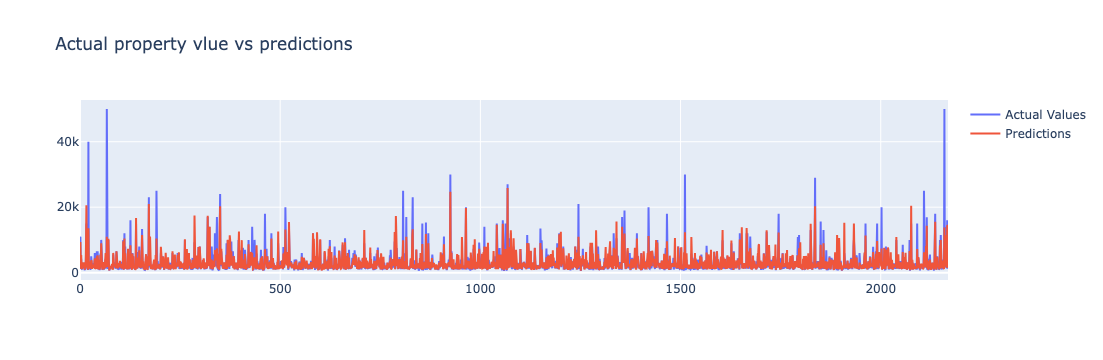

In [174]:
#Valores preditos vs valores reais nos dados que não foram utilizados para teste.
fig = go.Figure(data=[go.Scatter(y=y_test.values, name='Actual Values'),
                      go.Scatter(y=final_model_predictions, name='Predictions')])
fig.update_layout(title = 'Actual property vlue vs predictions')
fig.show()